In [3]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

In [4]:
# Flag to include/exclude the systematics 
# on the background shape
shapeSyst = True

In [5]:
npzfile  = np.load("histForMinuitFit.npz")
b_pdf    = npzfile['b_pdf']
b1_pdf   = npzfile['b1_pdf']
b2_pdf   = npzfile['b2_pdf']
s_pdf    = npzfile['s_pdf']
d        = npzfile['d']
binCen   = npzfile['binCen']
binEdges = npzfile['binEdges']

In [6]:
b_pdf  = b_pdf  / b_pdf.sum()
b1_pdf = b1_pdf / b1_pdf.sum()
b2_pdf = b2_pdf / b2_pdf.sum()
s_pdf  = s_pdf  / s_pdf.sum()


/home/jack/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


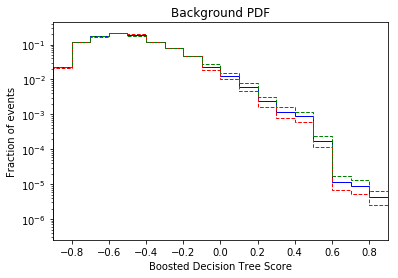

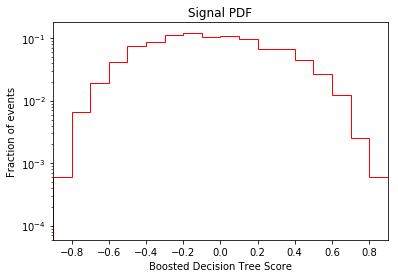

In [7]:
#%%capture #use to suppress the output of a cell
f1, a1 = plt.subplots()
a1.hist(binCen,binEdges,weights=b_pdf, histtype='step', log=True, color='blue')
a1.hist(binCen,binEdges,weights=b1_pdf, histtype='step', linestyle='dashed', log=True, color='red')
a1.hist(binCen,binEdges,weights=b2_pdf, histtype='step', linestyle='dashed', log=True, color='green')
a1.set_xlim(binEdges[0], binEdges[-1])
f2,a2 = plt.subplots()
a1.set_title("Background PDF")
a2.hist(binCen,binEdges,weights=s_pdf, histtype='step', log=True, color='red')
a2.set_xlim(binEdges[0], binEdges[-1])
a2.set_title("Signal PDF")
a1.set_xlabel("Boosted Decision Tree Score")
a1.set_ylabel("Fraction of events")
a2.set_xlabel("Boosted Decision Tree Score")
a2.set_ylabel("Fraction of events")
f1.show()
f2.show()

In [8]:
%%capture
# plot the data as we
f4,a4 = plt.subplots()
c4, b4, _ = a4.hist(binCen, binEdges, weights=d, log=True, color='black', histtype='step')
a4.set_xlim(b4[0], b4[-1])
a4.set_xlabel("Boosted Decision Tree Score")
a4.set_ylabel("Number of events")
a4.set_title("(Pseudo) Data")
f4.show()

In [9]:
new_b_pdf = new_b_pdf / new_b_pdf.sum() 

def NLL(S,B,alpha):
   
    # should be already normalized, but make sure
     
    temp = d * np.log(S*s_pdf + B*new_b_pdf)
    return S + B - temp.sum() + alpha*alpha/2.


NameError: name 'new_b_pdf' is not defined

In [10]:
new_b_pdf


NameError: name 'new_b_pdf' is not defined

In [12]:
m = Minuit(NLL, S=10., B=500., alpha=0., print_level=1,
           errordef=0.5, error_S=1.0, error_B=1.0, error_alpha=0.1,
           fix_alpha=(not shapeSyst))


In [31]:
# Run the fitter
#m.migrad()
#m.minos()
m.print_param()

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,S,19.9139,12.0961,-11.0101,12.6233,,,No
1,B,705.087,28.7901,-28.4336,29.0384,,,No
2,alpha,-0.413695,0.74877,-0.746364,0.768456,,,No


In [15]:
# Profile scan of the fitted function (NLL).
# At each FIXED value of S, fit again for B,
# extract the NLL at the minimum, subtract 
# the NLL at the GLOBAL minimum, and plot it
xxx, yyy, _ = m.mnprofile('S', subtract_min=True, bins=100, bound=(0,60))



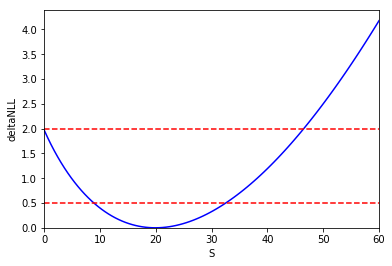

In [16]:
/# m.mnprofile does all the work... 
# Now we just plot the results
# deltaNLL = 0.5 (2, 4.5 ) corresponds to 1 (2, 3) sigma
fig3, ax3 = plt.subplots()
ax3.plot(xxx,yyy,linestyle='solid', color='b')
ax3.set_xlim(min(xxx), max(xxx))
ax3.set_ylim(0.)
ax3.set_xlabel('S')
ax3.set_ylabel('deltaNLL')
ax3.plot([min(xxx), max(xxx)], [0.5, 0.5], linestyle='dashed', color='red')
ax3.plot([min(xxx), max(xxx)], [2.0, 2.0], linestyle='dashed', color='red')
ax3.plot([min(xxx), max(xxx)], [4.5, 4.5], linestyle='dashed', color='red')
fig3.show()

In [17]:
fittedB = m.values['B']
fittedS = m.values['S']
fitteda = m.values['alpha']
if fitteda>0:
    bf_pdf = b_pdf + fitteda*(b1_pdf-b_pdf)
else:
    bf_pdf = b_pdf - fitteda*(b2_pdf-b_pdf)
bf_pdf = bf_pdf / bf_pdf.sum()

In [19]:
# Then plot stacked histograms of S and B
# lists with the data, colors, and labels of the two hist 
blah   = [binCen, binCen]
colors = ['blue', 'red']
names  = ['Background', 'Signal']
w2     = [fittedB*bf_pdf, fittedS*s_pdf]

Enter something to quit


''

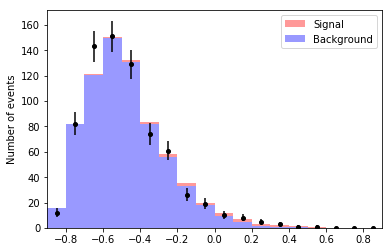

In [33]:
fig42, ax42 = plt.subplots()
ax42.hist(blah, binEdges, histtype='stepfilled', log=False,
          color=colors, stacked='True', label=names, weights=w2, alpha=0.4)
# We will want some of these error bars later on. 
# maybe try to put these in on other histogram stuff?
ax42.errorbar(binCen, d, yerr=np.sqrt(d), linestyle='none', marker='o', 
              color='black', markersize=4)
ax42.set_ylim(0.1)
ax42.set_xlim(binEdges[0], binEdges[-1])
ax42.legend()
ax42.set_ylabel("Number of events")
fig42.show()
input('Enter something to quit')